In [2]:
!pip install vaderSentiment
import json 
from pprint import pprint
import sys
import re
import numpy as np
import pandas as pd
import unicodedata
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
fileName = "gervsmex.json"

import json
from pandas.io.json import json_normalize
def json_readr(file):
    print(file)
    returnval = []
    for line in open(file, mode="r"):
        if "{" in line:
            returnval.append(json.loads(line))
        #yield json.loads(line['text'])
    return returnval
tweets = json_readr(fileName)
tweet_texts=json_normalize(tweets)


def clean_tweet( tweet):
    cleanString = re.sub('\n',' ', tweet )
    cleanString = re.sub('\r',' ', tweet )
    cleanString = re.sub(',',' ', cleanString )
    return cleanString

gervsmex.json


In [4]:
import matplotlib.pyplot as plt 
GerMexTweets = pd.DataFrame(tweet_texts)
!pip install langdetect
!pip install mtranslate
from langdetect import detect
from mtranslate import translate

for idx, tweet in GerMexTweets.iterrows():
    try:
        text = tweet['text']
        lang = detect()
        if not "en" in lang :
            text = translate(tweet['text'], "en", lang)
        GerMexTweets.at[idx,"text"] = lang = detect()
    except:
        pass
print(GerMexTweets.groupby('place.country_code').count().sort_values(by = "text")['text'])

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


place.country_code
         1
DM       1
GD       1
IR       1
KH       1
KY       1
MC       1
CU       1
ME       1
MT       1
MW       1
NZ       1
SI       1
SO       1
YE       1
MK       1
BZ       1
KG       1
BA       1
BG       1
BN       1
AZ       2
ET       2
SZ       2
TD       2
GP       2
SD       2
IM       2
SK       2
CV       2
      ... 
JP      55
AR      60
TH      66
BE      67
AU      74
SA      77
CL      84
PH      98
IE     100
PL     107
IT     117
KE     125
CO     129
MY     131
NL     134
GH     139
TR     141
FR     172
CA     187
NG     198
ES     199
ID     215
RU     247
IN     325
ZA     517
BR     686
MX     722
DE    1020
GB    1405
US    2731
Name: text, Length: 145, dtype: int64


In [15]:
MexTweets = GerMexTweets[GerMexTweets['place.country_code'] == "MX"].reset_index()
GerTweets = GerMexTweets[GerMexTweets['place.country_code'] == "DE"].reset_index()
USATweets = GerMexTweets[GerMexTweets['place.country_code'] == "US"].reset_index()
GBrTweets = GerMexTweets[GerMexTweets['place.country_code'] == "GB"].reset_index()
def calcPolarity(df_):
    analyzer = SentimentIntensityAnalyzer()
    polarity_scores = []
    count = 0
    for idx, tweet in df_.iterrows():
        vs = analyzer.polarity_scores(str(tweet['text']))
        polarity_scores.append(vs)
        count = count +1
    df_ = pd.concat([df_,pd.DataFrame(polarity_scores)],axis = 1)
    print(idx)
    print(count)
    print(len(polarity_scores))
    return df_
MexTweets = calcPolarity(MexTweets)
MexTweets.to_csv("MexTweetsWithVader.csv")
GerTweets = calcPolarity(GerTweets)
GerTweets.to_csv("GerTweetsWithVader.csv")
USATweets = calcPolarity(USATweets)
USATweets.to_csv("USATweetsWithVader.csv")
GBrTweets = calcPolarity(GBrTweets)
GBrTweets.to_csv("GBrTweetsWithVader.csv")
GerMexTweets = calcPolarity(GerMexTweets)
GerMexTweets.to_csv("GerMexTweetsWithVader.csv")

721
722
722
1019
1020
1020
2730
2731
2731
1404
1405
1405
405507
405508
405508


In [16]:
from datetime import datetime

def addDateTime(df):
    for index, tweet in df.iterrows():
        datetime_object = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S %z %Y')
        df.at[index, 'created_at'] = datetime_object
addDateTime(GerTweets)
addDateTime(MexTweets)
addDateTime(USATweets)
addDateTime(GBrTweets)

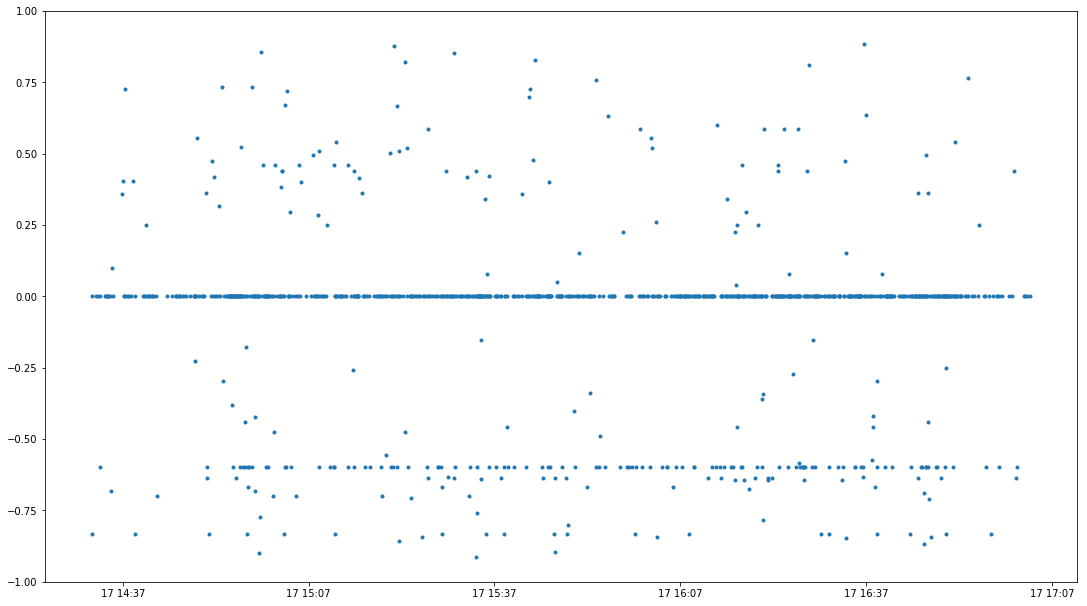

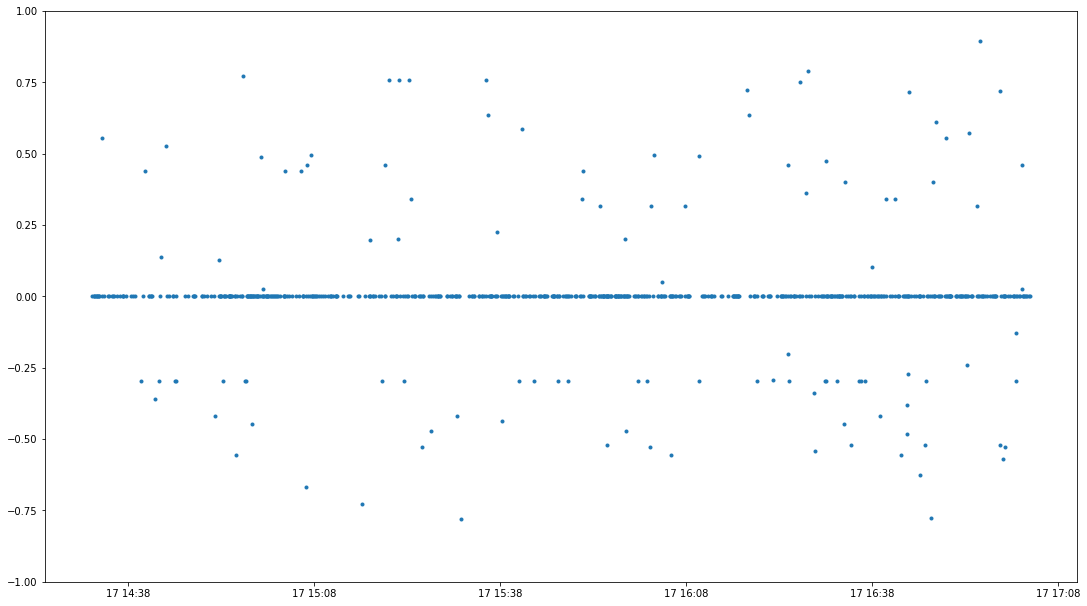

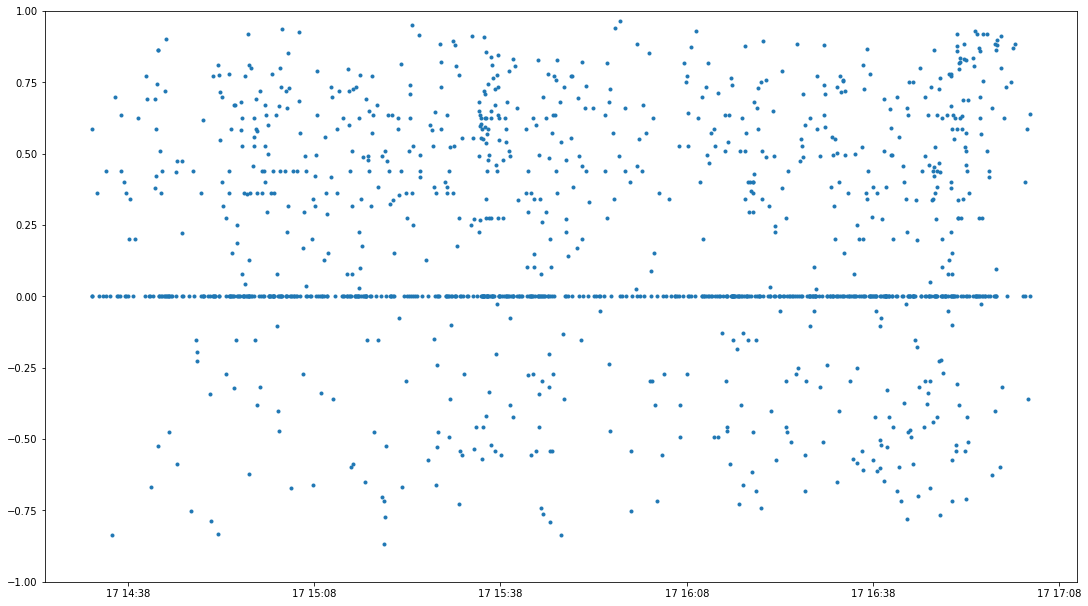

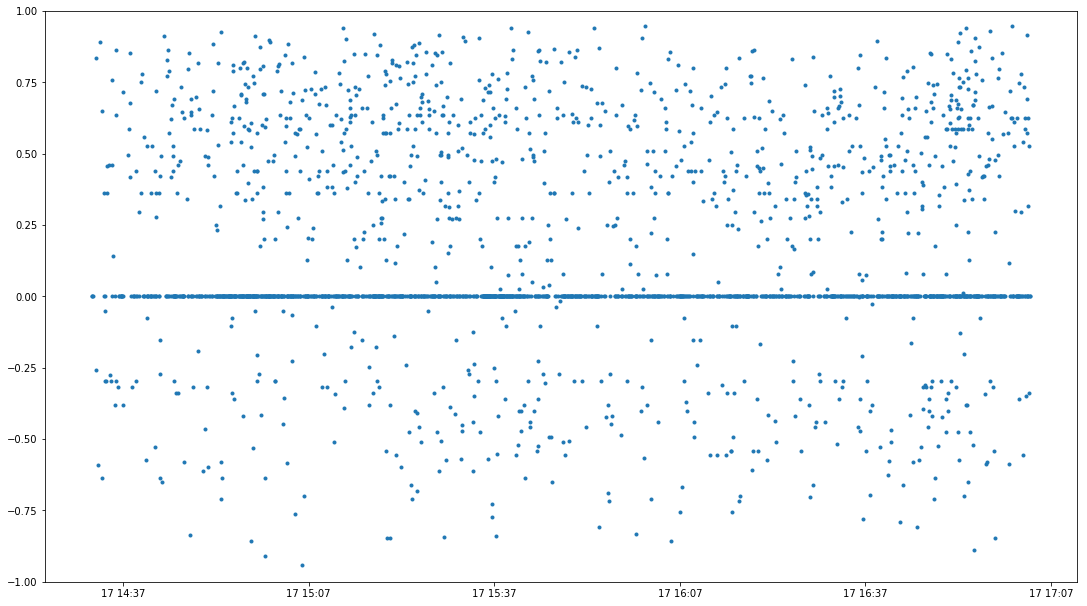

In [7]:
import matplotlib.dates as dates

def plotSentimentTimeSeries(df,name):
    Grouped_Time_Sentiments = df.groupby(['created_at'], as_index=True).max()
    Grouped_Time_Sentiments[['pos']].to_csv("{0}_sentiment_timeseries_pos.csv".format(name), index=False, header = False)
    Grouped_Time_Sentiments[['neg']].to_csv("{0}_sentiment_timeseries_neg.csv".format(name), index=False, header = False)
    Grouped_Time_Sentiments[['compound']].to_csv("{0}_sentiment_timeseries_compound.csv".format(name), index=False, header = False)
    Grouped_Time_Sentiments.head()
    idx = Grouped_Time_Sentiments.index
    fig, ax = plt.subplots()
    ax.plot_date(idx, Grouped_Time_Sentiments['compound'], '.')
    #ax.plot_date(idx, -1 * Grouped_Time_Sentiments['neg'], '.')
    plt.ylim(-1,1)
    fig.set_size_inches(18.5, 10.5)
    plt.show()
plotSentimentTimeSeries(GerTweets,"Ger")
plotSentimentTimeSeries(MexTweets,"Mex")
plotSentimentTimeSeries(GBrTweets,"GBr")
plotSentimentTimeSeries(USATweets,"USA")

In [8]:
for column in GerMexTweets.columns:
    if "reply" in column:
        print(column)

in_reply_to_screen_name
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
quoted_status.in_reply_to_screen_name
quoted_status.in_reply_to_status_id
quoted_status.in_reply_to_status_id_str
quoted_status.in_reply_to_user_id
quoted_status.in_reply_to_user_id_str
quoted_status.reply_count
reply_count
retweeted_status.in_reply_to_screen_name
retweeted_status.in_reply_to_status_id
retweeted_status.in_reply_to_status_id_str
retweeted_status.in_reply_to_user_id
retweeted_status.in_reply_to_user_id_str
retweeted_status.quoted_status.in_reply_to_screen_name
retweeted_status.quoted_status.in_reply_to_status_id
retweeted_status.quoted_status.in_reply_to_status_id_str
retweeted_status.quoted_status.in_reply_to_user_id
retweeted_status.quoted_status.in_reply_to_user_id_str
retweeted_status.quoted_status.reply_count
retweeted_status.reply_count


In [9]:
parentChildRelationships = [] #parent key: [child id]
def extractParent(tweet):    
    if type(tweet["in_reply_to_status_id_str"]) == str:
        if GerMexTweets[GerMexTweets["id_str"] == tweet["in_reply_to_status_id_str"]].shape[0] > 0:
            parentID = GerMexTweets[GerMexTweets["id_str"] == tweet["in_reply_to_status_id_str"]].iloc[0]["id_str"]
            childID = tweet["id_str"]
            #print(childID)
            parentChildRelationships.append([parentID,childID])
            grandParentID = GerMexTweets[GerMexTweets["id_str"] == parentID].iloc[0]["in_reply_to_status_id_str"]
            if type(grandParentID) != str or GerMexTweets[GerMexTweets["id_str"] == grandParentID].shape[0] == 0:
                ## parent is a root
                #print("root")
                parentChildRelationships.append([-1,parentID])
for idx, tweet in GerMexTweets.iterrows():
    extractParent(tweet)


In [10]:
trees = []
def findParentChildrenEdges(parentID):
    ParentChildrenEdges = []
    for relationship in parentChildRelationships:
        if relationship[0] == parentID:
            ParentChildrenEdges.append([parentID, relationship[1]])
    for ParentChildrenEdge in ParentChildrenEdges:
        ParentChildrenEdges.extend(findParentChildrenEdges(ParentChildrenEdge[1]))
    return ParentChildrenEdges

for relationship in parentChildRelationships:
    if relationship[0] == -1:
        #print("root")
        tree = findParentChildrenEdges(relationship[1])
        #print(tree)
        trees.append(tree)
with open('ReplyTrees.txt', 'w') as f:
    for item in trees:
        f.write("%s\n" % item)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
for tree in trees:
    if len(tree) > 10 :
        G = nx.DiGraph()
        pos=nx.get_node_attributes(G,'pos')
        for parentChildRelationship in tree:
            G.add_edge(int(parentChildRelationship[1]), int(parentChildRelationship[0]))
        fig, ax = plt.subplots()
        fig.set_size_inches(18.5, 10.5)
        nx.draw(G, with_labels=False, font_weight='bold')
        plt.show()


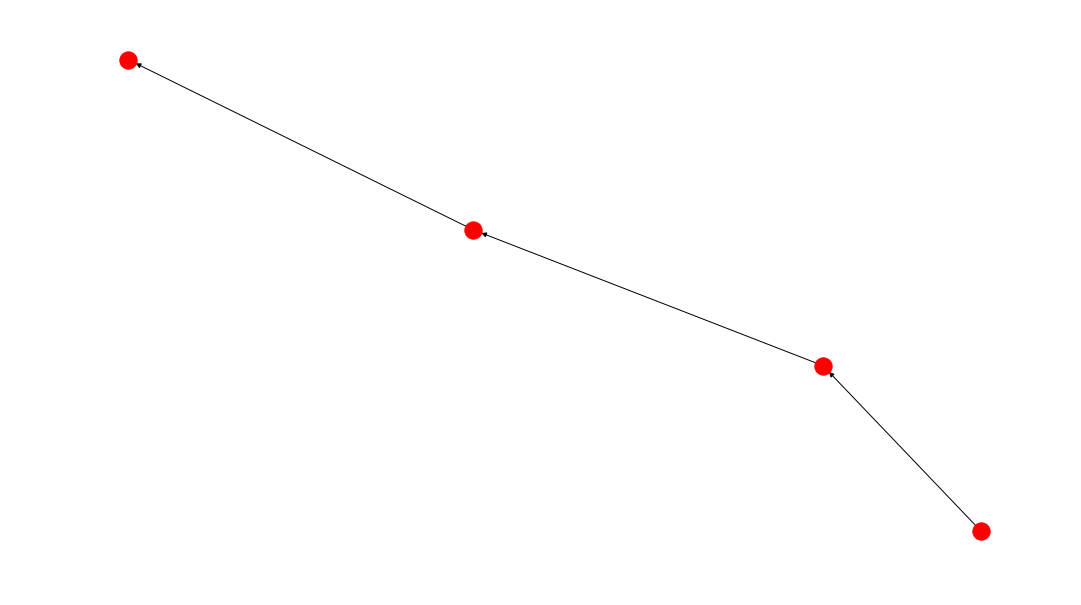

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
tree = trees[12]
G = nx.DiGraph()
pos=nx.get_node_attributes(G,'pos')
for parentChildRelationship in tree:
    G.add_edge(int(parentChildRelationship[1]), int(parentChildRelationship[0]))
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
nx.draw(G, with_labels=False, font_weight='bold')
plt.show()